## LLM assistant

In [ ]:
%load_ext JupyterChatbook

In [ ]:
%%chat -i=cw
How to import and display and image in a Jupyter notebook?

-------

## mondrianish

In [15]:
from mondrianish import *

colors = ("#FFF8F0", "#FCAA67", "#7DB7C0", "#932b25", "#498B57")
with open("random-mondrianish.png", "wb") as f:
	generate_image("png", (600, 400), 15, colors, f)

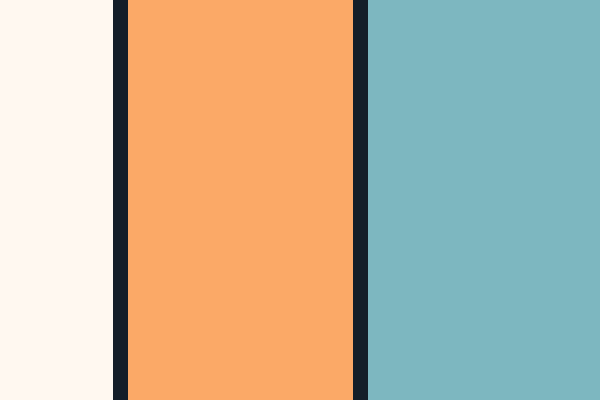

In [16]:
from PIL import Image
from IPython.display import Image, display

# Load the image
image = Image("./random-mondrianish.png")

# Display the image
display(image)

-------

## mondrian_maker

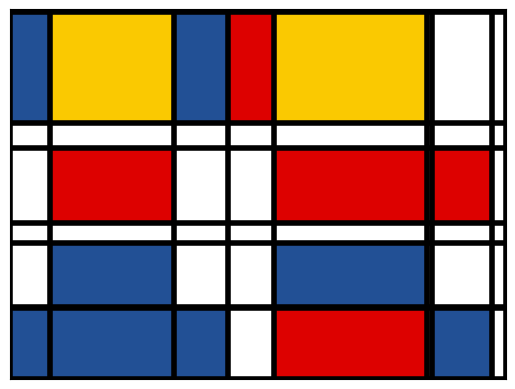

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [11]:
from mondrian_maker.mondrian import mondrian

m = mondrian()
m.make_mondrian()

----------

## mondriana

In [5]:
from PIL import Image, ImageDraw
import random
import os

def draw_line(draw, direction, position, start, end, line_width):
    if direction != 'horizontal':  # vertical
        draw.line((position, start, position, end), fill="black", width=line_width)
    else:
        draw.line((start, position, end, position), fill="black", width=line_width)

def add_color(draw, box, colors, line_width):
    color = random.choice(colors + ['white'] * 5)  # More weight on white
    draw.rectangle(box, fill=color, outline="black", width=line_width)

def generate_lines(start, end, min_lines, max_lines, min_gap):
    num_lines = random.randint(min_lines, max_lines)
    lines = []
    possible_positions = list(range(start + min_gap, end - min_gap))
    for _ in range(num_lines):
        if not possible_positions:
            break
        position = random.choice(possible_positions)
        lines.append(position)
        # Remove nearby positions to maintain the minimum gap
        for p in range(position - min_gap, position + min_gap + 1):
            if p in possible_positions:
                possible_positions.remove(p)
    return sorted(lines)

def subdivide_rectangle(draw, box, colors, line_width, depth, max_depth):
    left, top, right, bottom = box

    if depth >= max_depth or (right - left) < 100 or (bottom - top) < 100:
        add_color(draw, box, colors, line_width)
        return

    if random.random() < 0.5:  # 50% chance to subdivide
        if random.random() < 0.5:  # Subdivide horizontally
            y = random.randint(top + 50, bottom - 50)
            draw_line(draw, 'horizontal', y, left, right, line_width)
            subdivide_rectangle(draw, (left, top, right, y), colors, line_width, depth + 1, max_depth)
            subdivide_rectangle(draw, (left, y, right, bottom), colors, line_width, depth + 1, max_depth)
        else:  # Subdivide vertically
            x = random.randint(left + 50, right - 50)
            draw_line(draw, 'vertical', x, top, bottom, line_width)
            subdivide_rectangle(draw, (left, top, x, bottom), colors, line_width, depth + 1, max_depth)
            subdivide_rectangle(draw, (x, top, right, bottom), colors, line_width, depth + 1, max_depth)
    else:
        add_color(draw, box, colors, line_width)

def mondrian_style(width, height, min_lines=2, max_lines=4, min_gap=20, edge_buffer=50, line_width=4, max_depth=2):
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    v_lines = generate_lines(edge_buffer, width - edge_buffer, min_lines, max_lines, min_gap)
    h_lines = generate_lines(edge_buffer, height - edge_buffer, min_lines, max_lines, min_gap)

    for line in v_lines:
        draw_line(draw, 'vertical', line, 0, height, line_width)
    for line in h_lines:
        draw_line(draw, 'horizontal', line, 0, width, line_width)

    colors = ['red', 'blue', 'yellow', 'black']
    for i in range(len(v_lines) + 1):
        for j in range(len(h_lines) + 1):
            left = 0 if i == 0 else v_lines[i - 1]
            top = 0 if j == 0 else h_lines[j - 1]
            right = width if i == len(v_lines) else v_lines[i]
            bottom = height if j == len(h_lines) else h_lines[j]

            box = (left, top, right, bottom)
            subdivide_rectangle(draw, box, colors, line_width, 0, max_depth)

    # Save the image as a PNG file
    output_dir = "./"
    os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist
    output_path = os.path.join(output_dir, "mondrianpic.png")
    image.save(output_path)

canvas_width, canvas_height = 800, 480
mondrian_style(canvas_width, canvas_height)

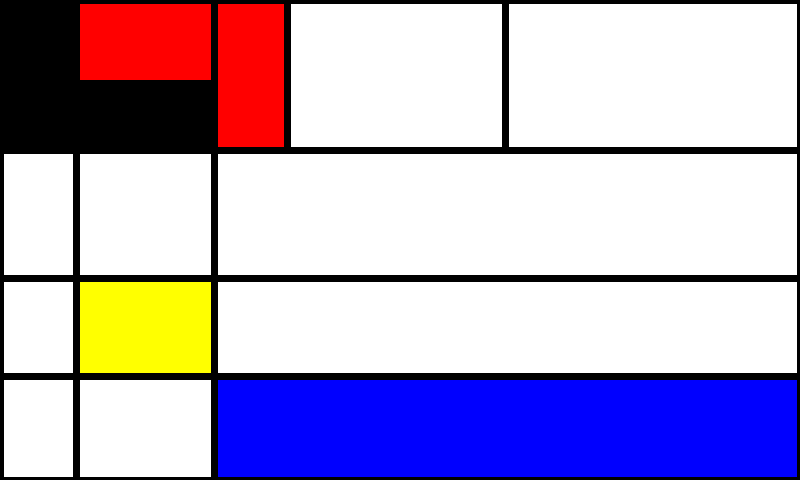

In [6]:
from IPython.display import Image, display

# Load the image
image = Image("./mondrianpic.png")

# Display the image
display(image)

--------

## Wolfram Language (WL)

In [12]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [13]:
graphic = session.evaluate(wl.ResourceFunction('RandomMondrian')())

path = "./wl-mondrian.png";
png_export = wl.Export(path, graphic, "PNG")
session.evaluate(png_export)

'./wl-mondrian.png'

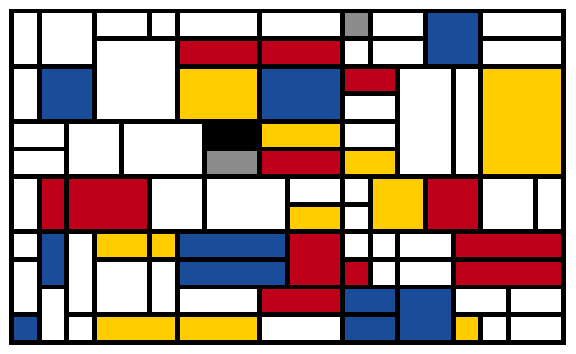

In [14]:
from IPython.display import Image, display
display(Image(path))